# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import db_connect
engine = db_connect()

In [2]:

# Me traigo los datos de la url proporcionada y los guardo localmente en mi proyecto
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen un total de 48895 filas (en este caso, habitaciones o propiedades) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `price`.

- Las variables `last_review` y `reviews_per_month` cuentan con valores nulos, pero siguen teniendo una cantidad de datos considerable como para tenerse en cuenta

- El resto de variables cuentan casi siempre todos los valores.

- Los datos cuentan con 10 características numéricas y 6 características categóricas si nos vamos estrictamente al tipo de dato que aparece en el dataset. A pesar de esto, consideraré como categóricas también las características `id` y `host_id`, debido a que no constituyen datos con relación matemática alguna, y sí presentan características de indicadores o etiquetas. Por tanto mi dataset quedaría con:<br>**8 características numéricas y 8 categóricas**

In [6]:
duplicados = df.duplicated(subset=['id'])
num_duplicados = duplicados.sum()
num_duplicados

np.int64(0)

In [26]:
# Seleccion de atributos relevantes
df_imp = df.drop(["name", "host_id", "host_name", "latitude", "longitude", "last_review", ], axis = 1)
df_imp

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,36485057,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,36485431,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [32]:
# Variables categoricas ["neighbourhood_group", "neighbourhood", "room_type"]
print(df_imp["neighbourhood_group"].value_counts(), "\n")
print(df_imp["neighbourhood"].value_counts(), "\n")
print(df_imp["room_type"].value_counts(), "\n")

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64 

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64 



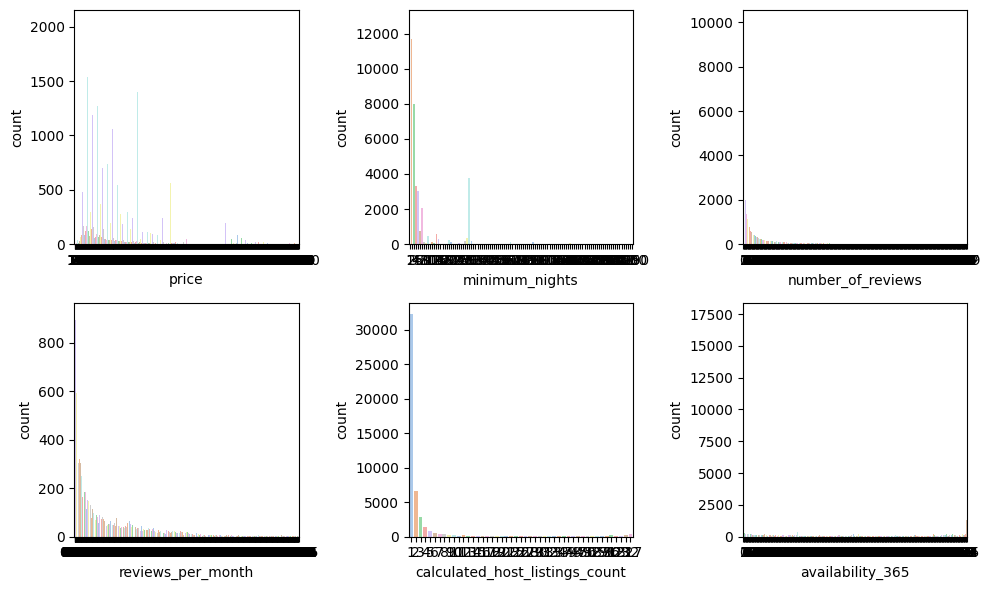

In [43]:
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

sns.countplot(ax = axis[0, 0], data = df, x = "price", palette='pastel', hue= "price", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "minimum_nights", palette='pastel', hue= "minimum_nights", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "number_of_reviews", palette='pastel', hue= "number_of_reviews", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "reviews_per_month", palette='pastel', hue= "reviews_per_month", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "calculated_host_listings_count", palette='pastel', hue= "calculated_host_listings_count", legend=False)
sns.countplot(ax = axis[1, 2], data = df, x = "availability_365", palette='pastel', hue= "availability_365", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()